In [1]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [3]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv', index_col=0)
train_y = pd.read_csv('train_y.csv', index_col=0)
test_x = pd.read_csv('test_x.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)

In [4]:
train_x.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),시정(10m),지면온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,31.0,18.0,18.7,0.0,1.0,20.0,85.0,18.3,998.8,1008.7,2000.0,17.4,10,1,1,10.0
1,0.003,0.6,0.002,0.035,27.0,16.0,18.3,0.0,0.3,0.0,89.0,18.6,998.9,1008.8,2000.0,17.2,10,1,2,9.0
2,0.003,0.6,0.002,0.033,28.0,18.0,17.7,0.0,2.0,20.0,92.0,18.5,998.1,1008.1,2000.0,17.0,10,1,3,9.0
3,0.003,0.6,0.002,0.030,26.0,16.0,17.4,0.0,1.0,50.0,91.0,18.1,997.9,1007.9,2000.0,16.5,10,1,4,10.0
4,0.003,0.5,0.003,0.026,26.0,16.0,17.2,0.0,1.3,270.0,94.0,18.4,998.4,1008.4,1995.0,16.6,10,1,5,11.0


In [5]:
train_y.head()

,PM10_1
0,31.0
1,31.0
2,27.0
3,28.0
4,26.0


---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [6]:
# LinearRegression 코드를 작성하세요.
model_lr = LinearRegression()

model_lr.fit(train_x, train_y)

LinearRegression()

In [7]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model_lr.predict(test_x)

In [8]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print(f'{mse(test_y, y_pred_LR):.5f}')
print(f'{r2_score(test_y, y_pred_LR):.5f}')

43.54028
0.91953


In [9]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model_lr, './model_lr.pkl')

['./model_lr.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [10]:
train_x.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),시정(10m),지면온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,31.0,18.0,18.7,0.0,1.0,20.0,85.0,18.3,998.8,1008.7,2000.0,17.4,10,1,1,10.0
1,0.003,0.6,0.002,0.035,27.0,16.0,18.3,0.0,0.3,0.0,89.0,18.6,998.9,1008.8,2000.0,17.2,10,1,2,9.0
2,0.003,0.6,0.002,0.033,28.0,18.0,17.7,0.0,2.0,20.0,92.0,18.5,998.1,1008.1,2000.0,17.0,10,1,3,9.0
3,0.003,0.6,0.002,0.030,26.0,16.0,17.4,0.0,1.0,50.0,91.0,18.1,997.9,1007.9,2000.0,16.5,10,1,4,10.0
4,0.003,0.5,0.003,0.026,26.0,16.0,17.2,0.0,1.3,270.0,94.0,18.4,998.4,1008.4,1995.0,16.6,10,1,5,11.0


In [11]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model_rfr = RFR()
model_rfr.fit(train_x, train_y)

RandomForestRegressor()

In [12]:
# Test 데이터로 성능을 평가해보세요.
y_pred_RFR = model_rfr.predict(test_x)

print(f'{mse(test_y, y_pred_RFR):.5f}')
print(f'{r2_score(test_y, y_pred_RFR):.5f}')

47.26468
0.91265


In [13]:
#50.89374
#0.90594

In [14]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model_lr, './model_rfr.pkl')

['./model_rfr.pkl']

In [15]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
model_rfr.feature_importances_

array([1.15574765e-03, 8.97099957e-04, 1.41547170e-03, 2.80052809e-03,
       9.56467910e-01, 4.48944392e-03, 1.87681635e-03, 6.65727853e-04,
       1.69949644e-03, 9.98616390e-04, 2.32596303e-03, 2.05638558e-03,
       1.44935598e-03, 1.44184934e-03, 1.41655586e-03, 1.95872642e-03,
       4.58694047e-04, 1.59142294e-03, 9.14370932e-03, 5.69047950e-03])

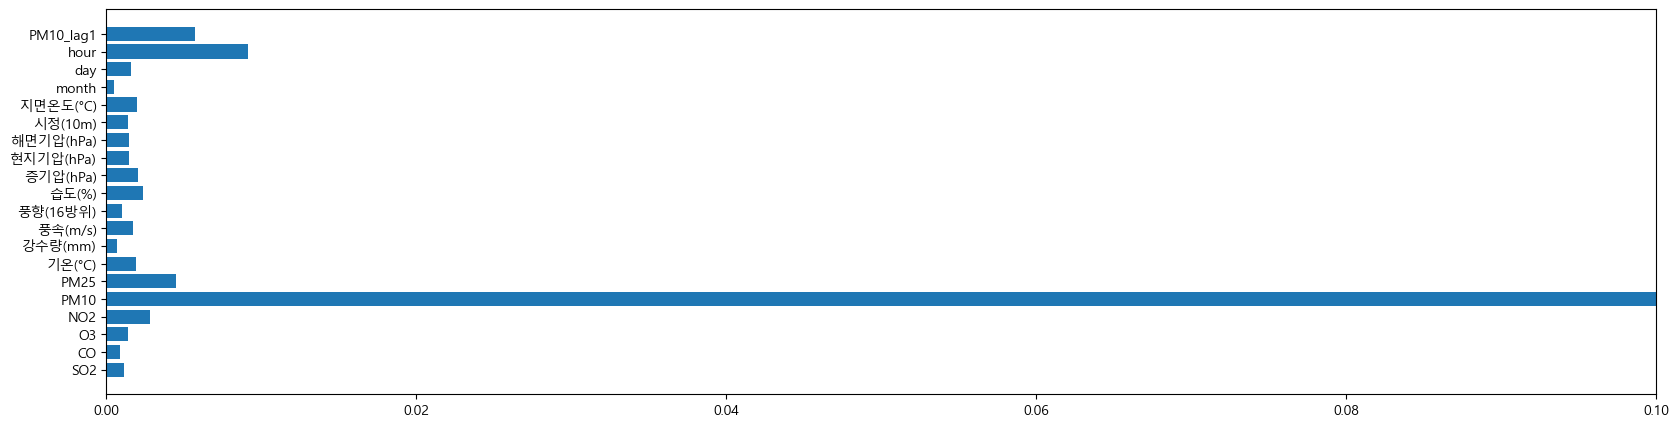

In [16]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=[20,5])
plt.barh(y=list(train_x), width=model_rfr.feature_importances_)
plt.xlim([0,0.1])
plt.show()

In [17]:
# (선택) 확인할 수 있는 인사이트
# 1. 전날 미세먼지 농도에 절대적으로 큰 영향 -> 당연하지 않나? 이것도 예측인가?
# 2. 시간에 영향을 많이 받는다.
# 3. 의외로 월에는 영향을 거의 안 받는다. 봄철이 심하지 않나싶은데
# 4. 강수량에도 영향을 거의 안 받는다

#### PM, 시정 삭제

In [18]:
train_x_except_pm = train_x[:].drop(columns=['PM10','PM25', '시정(10m)'], axis=1)
test_x_except_pm = test_x[:].drop(['PM10','PM25', '시정(10m)'], axis=1)

In [19]:
model_rfr_ex_pm = RFR()
model_rfr_ex_pm.fit(train_x_except_pm, train_y)

RandomForestRegressor()

In [20]:
pred_y = model_rfr_ex_pm.predict(test_x_except_pm)

print(f'{mse(test_y, y_pred_RFR):.5f}')
print(f'{r2_score(test_y, y_pred_RFR):.5f}')

47.26468
0.91265


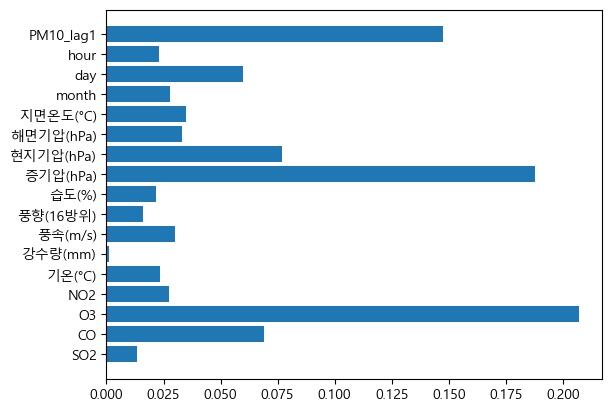

In [21]:
plt.barh(y=list(train_x_except_pm), width=model_rfr_ex_pm.feature_importances_)
plt.show()

In [22]:
# 1. O3 에 영향
# 2. 수증기압에 영향 받음

#### 계절별로 나누어본것

In [23]:
train_x.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),시정(10m),지면온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,31.0,18.0,18.7,0.0,1.0,20.0,85.0,18.3,998.8,1008.7,2000.0,17.4,10,1,1,10.0
1,0.003,0.6,0.002,0.035,27.0,16.0,18.3,0.0,0.3,0.0,89.0,18.6,998.9,1008.8,2000.0,17.2,10,1,2,9.0
2,0.003,0.6,0.002,0.033,28.0,18.0,17.7,0.0,2.0,20.0,92.0,18.5,998.1,1008.1,2000.0,17.0,10,1,3,9.0
3,0.003,0.6,0.002,0.030,26.0,16.0,17.4,0.0,1.0,50.0,91.0,18.1,997.9,1007.9,2000.0,16.5,10,1,4,10.0
4,0.003,0.5,0.003,0.026,26.0,16.0,17.2,0.0,1.3,270.0,94.0,18.4,998.4,1008.4,1995.0,16.6,10,1,5,11.0


In [24]:
train_x_with_season = train_x[:]
test_x_with_season = test_x[:]

In [25]:
train_x_with_season['season'] = train_x_with_season['month'].apply(lambda month: 0 if month in [3,4,5] else 1 if month in [6,7,8] else 2 if month in [9,10,11] else 3)
test_x_with_season['season'] = test_x_with_season['month'].apply(lambda month: 0 if month in [3,4,5] else 1 if month in [6,7,8] else 2 if month in [9,10,11] else 3)
train_x_with_season['season'].value_counts()

0    2208
1    2208
2    2184
3    2159
Name: season, dtype: int64

In [26]:
model_rfr_with_seasons = RFR()
model_rfr_with_seasons.fit(train_x_with_season, train_y)
y_pred_RFR = model_rfr_with_seasons.predict(test_x_with_season)
print(f'{mse(test_y, y_pred_RFR):.5f}')
print(f'{r2_score(test_y, y_pred_RFR):.5f}')

49.94354
0.90770


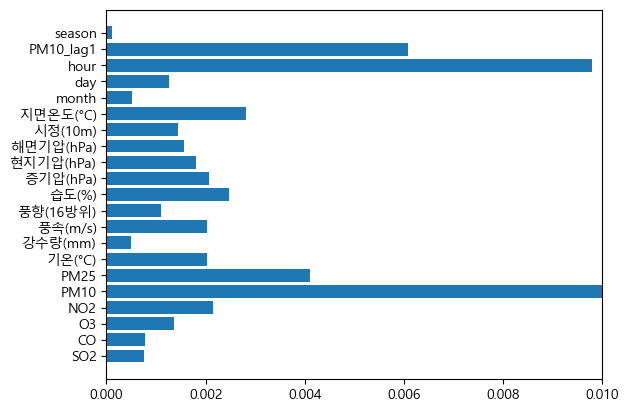

In [27]:
plt.barh(y=list(test_x_with_season), width=model_rfr_with_seasons.feature_importances_)
plt.xlim([0,0.01])
plt.show()

In [28]:
# 계절 - 관련없다

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [29]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model_gbr = GBR()
model_gbr.fit(train_x, train_y)

GradientBoostingRegressor()

In [30]:
# Test 데이터로 성능을 평가해보세요.
y_pred_GBR = model_gbr.predict(test_x)
print(f'{mse(test_y, y_pred_GBR):.5f}')
print(f'{r2_score(test_y, y_pred_GBR):.5f}')

50.04426
0.90751


In [31]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model_lr, './model_gbr.pkl')

['./model_gbr.pkl']

In [32]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
model_gbr.feature_importances_

array([2.83985306e-05, 2.43405036e-04, 3.33707824e-05, 1.01647573e-03,
       9.76605755e-01, 1.14195247e-03, 5.71740777e-04, 1.17500483e-04,
       5.86613151e-04, 1.34358227e-03, 5.81387457e-04, 3.22022950e-04,
       1.17460788e-04, 2.62628869e-04, 1.51503404e-03, 2.12300918e-03,
       1.00428926e-05, 1.90625981e-04, 8.93041438e-03, 4.25857890e-03])

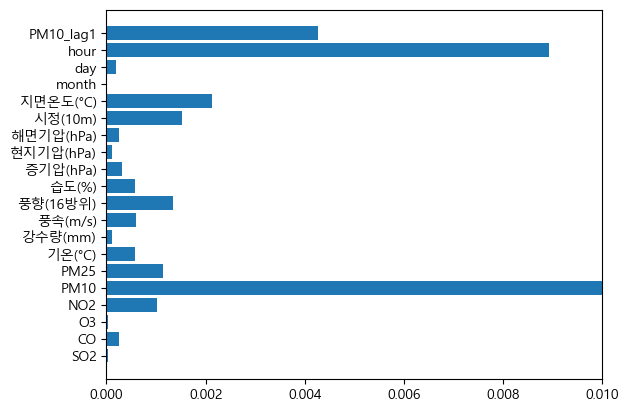

In [33]:
plt.barh(y=list(train_x),width=model_gbr.feature_importances_)
plt.xlim([0,0.01])
plt.show()

In [34]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [35]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Test 데이터로 성능을 평가해보세요.
result={
    'lgbm': cross_val_score(model_lgbm, train_x,train_y, cv=10).mean(),
    'gbr': cross_val_score(model_gbr, train_x,train_y, cv=10).mean(),
    'rfr': cross_val_score(model_rfr, train_x,train_y, cv=10).mean(),
    'lr': cross_val_score(model_lr, train_x,train_y, cv=10).mean(),
}

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 7883, number of used features: 20
[LightGBM] [Info] Start training from score 39.953931
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2455
[LightGBM] [Info] Number of data points in the train set: 7883, number of used features: 20
[LightGBM] [Info] Start training from score 38.615706
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the 

In [49]:
result

{'lgbm': 0.9036728929060376,
 'gbr': 0.9107028843271096,
 'rfr': 0.894945854504785,
 'lr': 0.9174805492457156}

In [50]:
cross_val_score(model_lr, train_x,train_y, cv=10).mean()

0.9174805492457156

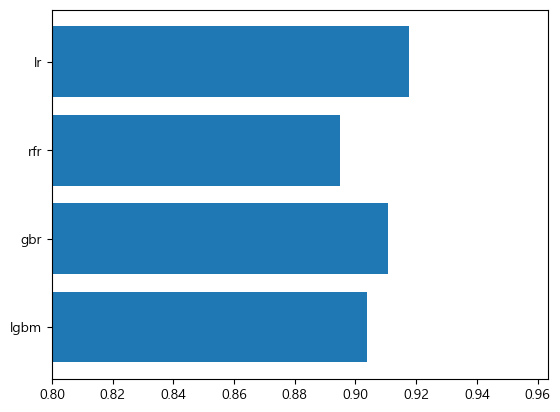

In [52]:
plt.barh(list(result), result.values())
plt.xlim(0.8)
plt.show()

In [40]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [41]:
# Feature의 중요도 확인





In [42]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

In [43]:
train_x_except_pm.head()

,SO2,CO,O3,NO2,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,18.7,0.0,1.0,20.0,85.0,18.3,998.8,1008.7,17.4,10,1,1,10.0
1,0.003,0.6,0.002,0.035,18.3,0.0,0.3,0.0,89.0,18.6,998.9,1008.8,17.2,10,1,2,9.0
2,0.003,0.6,0.002,0.033,17.7,0.0,2.0,20.0,92.0,18.5,998.1,1008.1,17.0,10,1,3,9.0
3,0.003,0.6,0.002,0.030,17.4,0.0,1.0,50.0,91.0,18.1,997.9,1007.9,16.5,10,1,4,10.0
4,0.003,0.5,0.003,0.026,17.2,0.0,1.3,270.0,94.0,18.4,998.4,1008.4,16.6,10,1,5,11.0


In [44]:
import numpy as np

In [45]:
result_except_pm={
    'lgbm': np.sqrt(cross_val_score(model_lgbm, train_x_except_pm,train_y, cv=10, scoring='neg_mean_squared_error')*-1).mean(),
    'gbr': np.sqrt(cross_val_score(model_gbr, train_x_except_pm,train_y, cv=10, scoring='neg_mean_squared_error')*-1).mean(),
    'rfr': np.sqrt(cross_val_score(model_rfr, train_x_except_pm,train_y, cv=10, scoring='neg_mean_squared_error')*-1).mean(),
    'lr': np.sqrt(cross_val_score(model_lr, train_x_except_pm,train_y, cv=10, scoring='neg_mean_squared_error')*-1).mean(),
}

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 7883, number of used features: 17
[LightGBM] [Info] Start training from score 39.953931
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 7883, number of used features: 17
[LightGBM] [Info] Start training from score 38.615706
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 7883, number of used features: 17
[LightGBM] [Info] S

In [46]:
result_except_pm

{'lgbm': 37.70150382148775,
 'gbr': 39.023524999808416,
 'rfr': 36.8712605983596,
 'lr': 34.48376803290414}

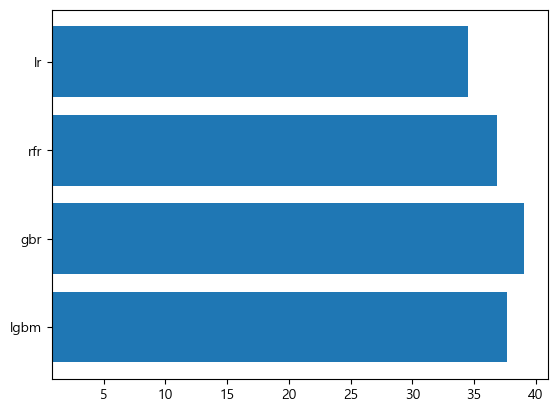

In [47]:
plt.barh(y=list(result_except_pm), width=result_except_pm.values())
plt.xlim(0.8)
plt.show()

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [48]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

